# Starting Kit - FAIR UNIVERSE: HIGGSML UNCERTAINTY CHALLENGE

For Overview and Decsiptions of the competition, please visit the competition page

## Setup

### ⚠️ Note:
If you are running this starting kit locally, you may want to use a dedicated conda env.  
[Instructions to setup a conda env](https://github.com/FAIR-Universe/HEP-Challenge/tree/master/conda)

`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB = 'google.colab' in str(get_ipython())

In [2]:
if COLAB:
    # clone github repo
    !git clone https://github.com/FAIR-Universe/HEP-Challenge.git

    # move to the HEP starting kit folder
    %cd HEP-Challenge/

    # Install required packages
    !pip install conda/requirements.txt 

In [3]:
TEST_SETTINGS = {
"systematics": {  # Systematics to use
    "tes": True, # tau energy scale
    "jes": False, # jet energy scale
    "soft_met": False, # soft term in MET
    "ttbar_scale": False, # ttbar scale factor
    "diboson_scale": False, # diboson scale factor
    "bkg_scale": False, # Background scale factor
    },
"num_pseudo_experiments" : 2 , # Number of pseudo-experiments to run per set
"num_of_sets" : 5, # Number of sets of pseudo-experiments to run
} 

USE_RANDOM_MUS = True

## Existing Submissions
By this point you should have a clone of the repo which contains `HiggsML_Dummy_Submission.zip` which you can submit to the Competition

For more sample submissions please check `/HEP-Challenge/example_submissions/`

### Imports

In [4]:
from sys import path
import numpy as np
import json
import os

### Directories

In [5]:

root_dir = os.getcwd()
print("Root directory is", root_dir)

input_dir = os.path.join(root_dir, "input_data")
output_dir = os.path.join(root_dir, "sample_result_submission")
submission_dir = os.path.join(root_dir, "sample_code_submission")
program_dir = os.path.join(root_dir, "ingestion_program")
score_dir = os.path.join(root_dir, "scoring_program")
    
test_settings = TEST_SETTINGS.copy()

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
if USE_RANDOM_MUS:
    test_settings[ "ground_truth_mus"] = (np.random.uniform(0.1, 3, test_settings["num_of_sets"])).tolist()
    
    random_settings_file = os.path.join(output_dir, "random_mu.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings_file = os.path.join(input_dir, "test", "settings", "data.json")
    with open(test_settings_file) as f:
        test_settings = json.load(f)


Root directory is /Users/ihsanullah/Desktop/ParisSaclay/Fair Universe/HEP-Challenge



### Add directories to path

In [6]:
path.append(program_dir)
path.append(submission_dir)
path.append(score_dir)

***
# Internal imports
***

In [7]:
from visualization import *
from systematics import systematics

***
# Import Submission Model
***
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements an XGBoost model which is trained to predict both the TES and the class label. You can find the code in `HEP-Challenge/sample_code_submission/model.py`. You can modify it the way you want, keeping the required class structure and functions there. More instructions are given inside the `model.py` file. If running in Collab, click the folder icon in the left sidebar to open the file browser.

### ⚠️ Note:
In real setting i.e. the challenge itself, the submitted model is initialized once with train set and systematics class and the `predict` is called multiple times, each time with a different test sets. 

In [8]:
from model import Model
from datasets import Data

***
## Data
***

### ⚠️ Note:
The data used here is a small sample data is for demonstration only to get a view of what the data looks like. 

`USE_PUBLIC_DATASET` determines whether to use a public dataset provided for the participants or use a small sample datafor quick execution of this notebook

In [9]:
USE_PUBLIC_DATASET = False

`USE_PUBLIC_DATASET` determines whether to use a public dataset provided for the participants or use a small subset of the data for quick execution of this notebook

In [10]:
if USE_PUBLIC_DATASET:
    from datasets import Neurips2024_public_dataset as public_dataset
    data = public_dataset()
else:
    data = Data(input_dir)

The function loads the downloaded data in the public_data folder or downloads the data from codabench using `wget` in the absence of the downloaded data, 

In [11]:
# load train set
data.load_train_set()

[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 28 entries, PRI_lep_pt to DER_lep_eta_centrality
dtypes: float32(28)
memory usage: 85.4 MB
None
[+] Train data loaded successfully


In [12]:
# load test sets
data.load_test_set()

[*] Loading Test data
[+] Test data loaded successfully


***
# Visualize
***
- Visualize Train set

In [13]:
data_vis = systematics(data.get_train_set())

train_visualize = Dataset_visualise(
    data_set=data_vis,
    columns=[
        "PRI_jet_leading_pt",
        "PRI_met",
        "DER_mass_vis",
        "DER_mass_jet_jet",
        "DER_sum_pt",
    ],
    name="Train Set",
)

In [14]:
# Show data summary
train_visualize.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 711724
[*] --- Number of features : 28
   diboson   11943.000478301412
   htautau   3310.1146314142693
   ttbar   146432.08122222128
   ztautau   3057287.858187503
[*] --- Number of signal events : 430123
[*] --- Number of background events : 281601
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
1,28.976999,0.070,2.525,44.601002,-0.167,-0.463,44.601002,-0.167,-0.463,-25.000000,...,6.684668,-25.000,-25.000000,-25.000000,2.997384,49.805416,118.179001,0.649694,-1.002652,-25.000000
2,32.645000,2.320,-1.575,43.087002,2.060,2.787,72.301003,1.014,0.710,43.087002,...,64.748856,1.046,113.939148,2.088840,1.938699,45.159561,191.119995,0.757653,1.347131,0.106309
3,23.421000,1.933,-2.384,49.160999,1.713,0.809,49.160999,1.713,0.809,-25.000000,...,17.372679,-25.000,-25.000000,-25.000000,3.098007,66.274605,121.742996,0.476414,-1.412765,-25.000000
4,42.250000,-1.369,-0.127,35.487000,-2.116,-2.261,39.310001,-1.015,2.409,35.487000,...,37.457161,1.101,69.116577,2.147740,2.260965,43.311462,152.533997,1.190577,-0.786189,0.880371
5,54.939999,2.079,-2.980,50.431999,1.944,1.139,53.591000,3.277,0.219,50.431999,...,56.143490,1.333,87.679817,6.370488,2.168392,92.524094,245.569992,1.089388,0.603246,0.529445


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
count,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,...,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,711724.000000,7.117240e+05
mean,37.266895,-0.000915,-0.004142,48.682297,-0.001200,-0.001862,67.910286,0.000634,0.002748,18.359207,...,54.289490,-10.274333,119.953402,-11.055380,2.626285,57.877789,204.580658,0.866315,0.340585,-1.105828e+01
std,21.719917,1.195473,1.812786,25.105379,1.215545,1.814271,53.956211,1.495340,1.813255,46.518219,...,65.190613,13.381253,253.399000,12.806245,0.672593,38.188740,144.525055,0.551567,1.178014,1.263542e+01
min,20.000000,-2.500000,-3.142000,26.000000,-2.677000,-3.142000,26.000000,-4.959000,-3.142000,-25.000000,...,0.008994,-25.000000,-25.000000,-25.000000,0.494677,0.016356,72.076996,0.032507,-1.414214,-2.500000e+01
25%,24.799000,-0.919000,-1.570000,33.841999,-0.939000,-1.577000,37.971001,-1.086000,-1.569000,-25.000000,...,13.285318,-25.000000,-25.000000,-25.000000,2.263099,36.591846,112.492748,0.550280,-1.223161,-2.500000e+01
50%,31.044001,0.000000,-0.003000,42.306999,-0.002000,-0.006000,49.779999,0.001000,0.006000,28.198000,...,28.967583,0.266000,60.759396,-2.838448,2.871401,49.911308,154.498993,0.743545,1.024970,2.678915e-17
75%,41.549999,0.915000,1.564000,54.872002,0.939000,1.570000,73.952003,1.091000,1.576000,45.500000,...,69.963968,1.687000,166.687435,0.350520,3.102934,68.285707,242.916260,1.012798,1.376349,3.678795e-01
max,892.943970,2.500000,3.142000,1070.329956,2.695000,3.142000,1196.420044,4.962000,3.142000,891.482971,...,1162.134033,9.042000,6651.900391,18.870487,5.807335,1053.422485,3154.763916,19.226536,1.414214,1.000000e+00


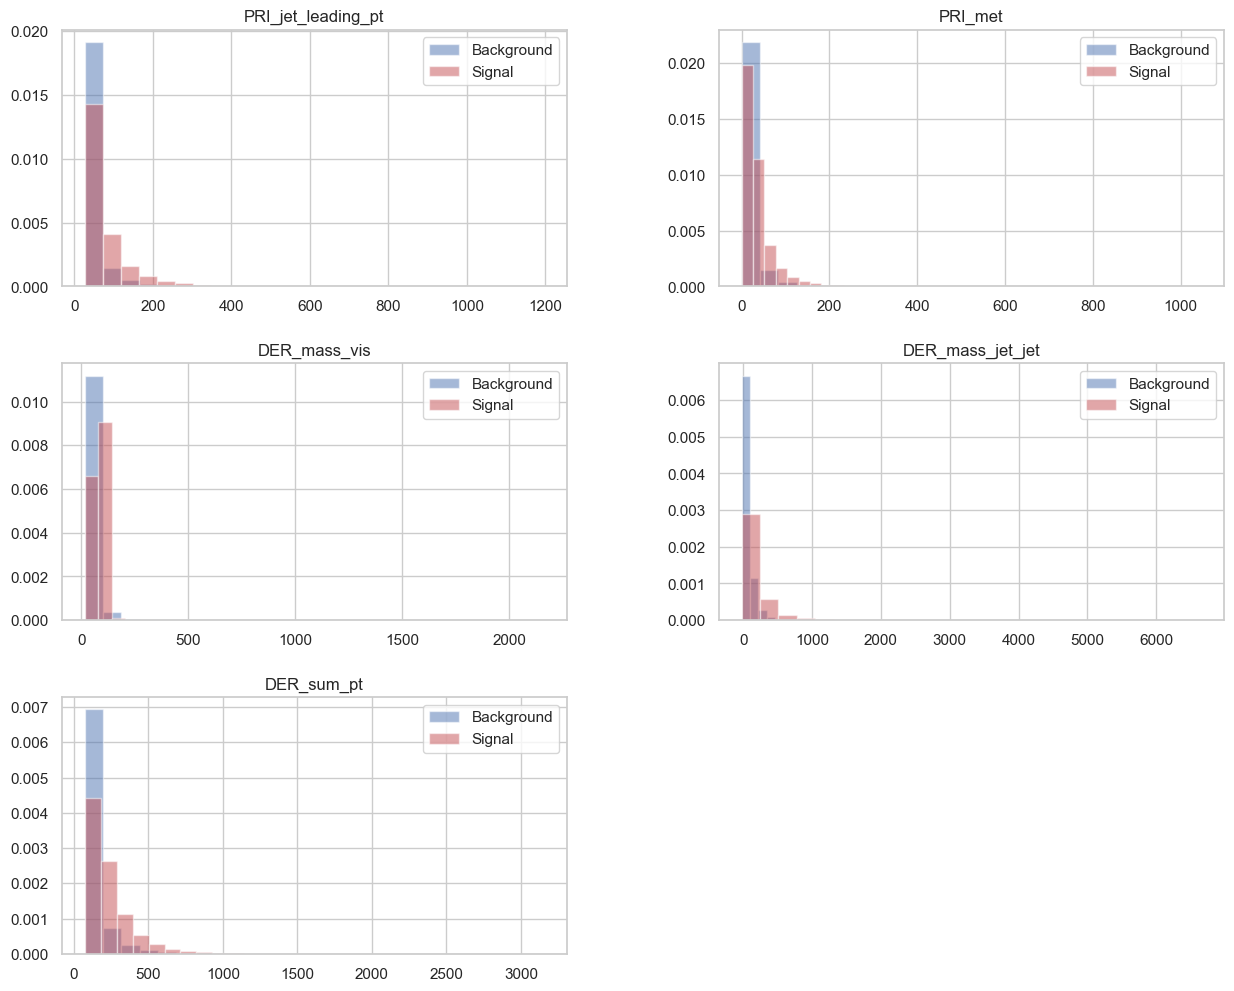

In [15]:
# Show data summary
train_visualize.histogram_dataset()

diboson (14560,)
diboson (14560,)
htautau (30,)
ttbar (19484,)
ttbar (19484,)
ztautau (247557,)
ztautau (247557,)


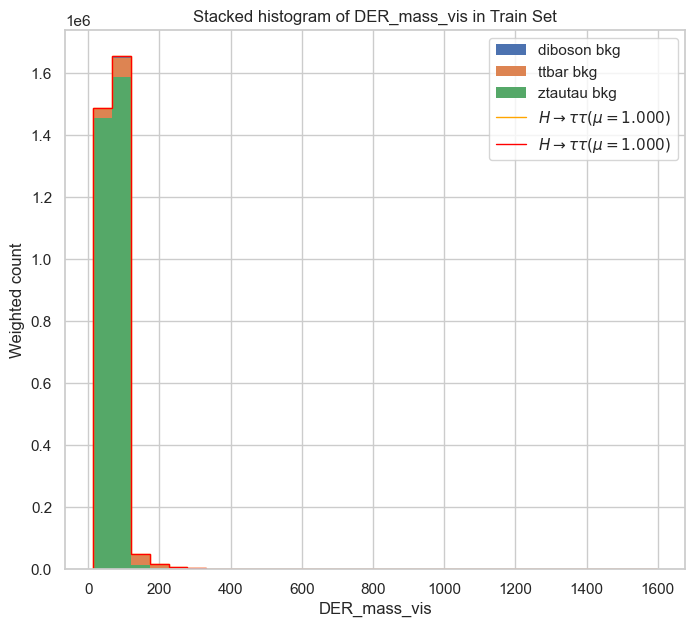

In [16]:
train_visualize.stacked_histogram("DER_mass_vis")

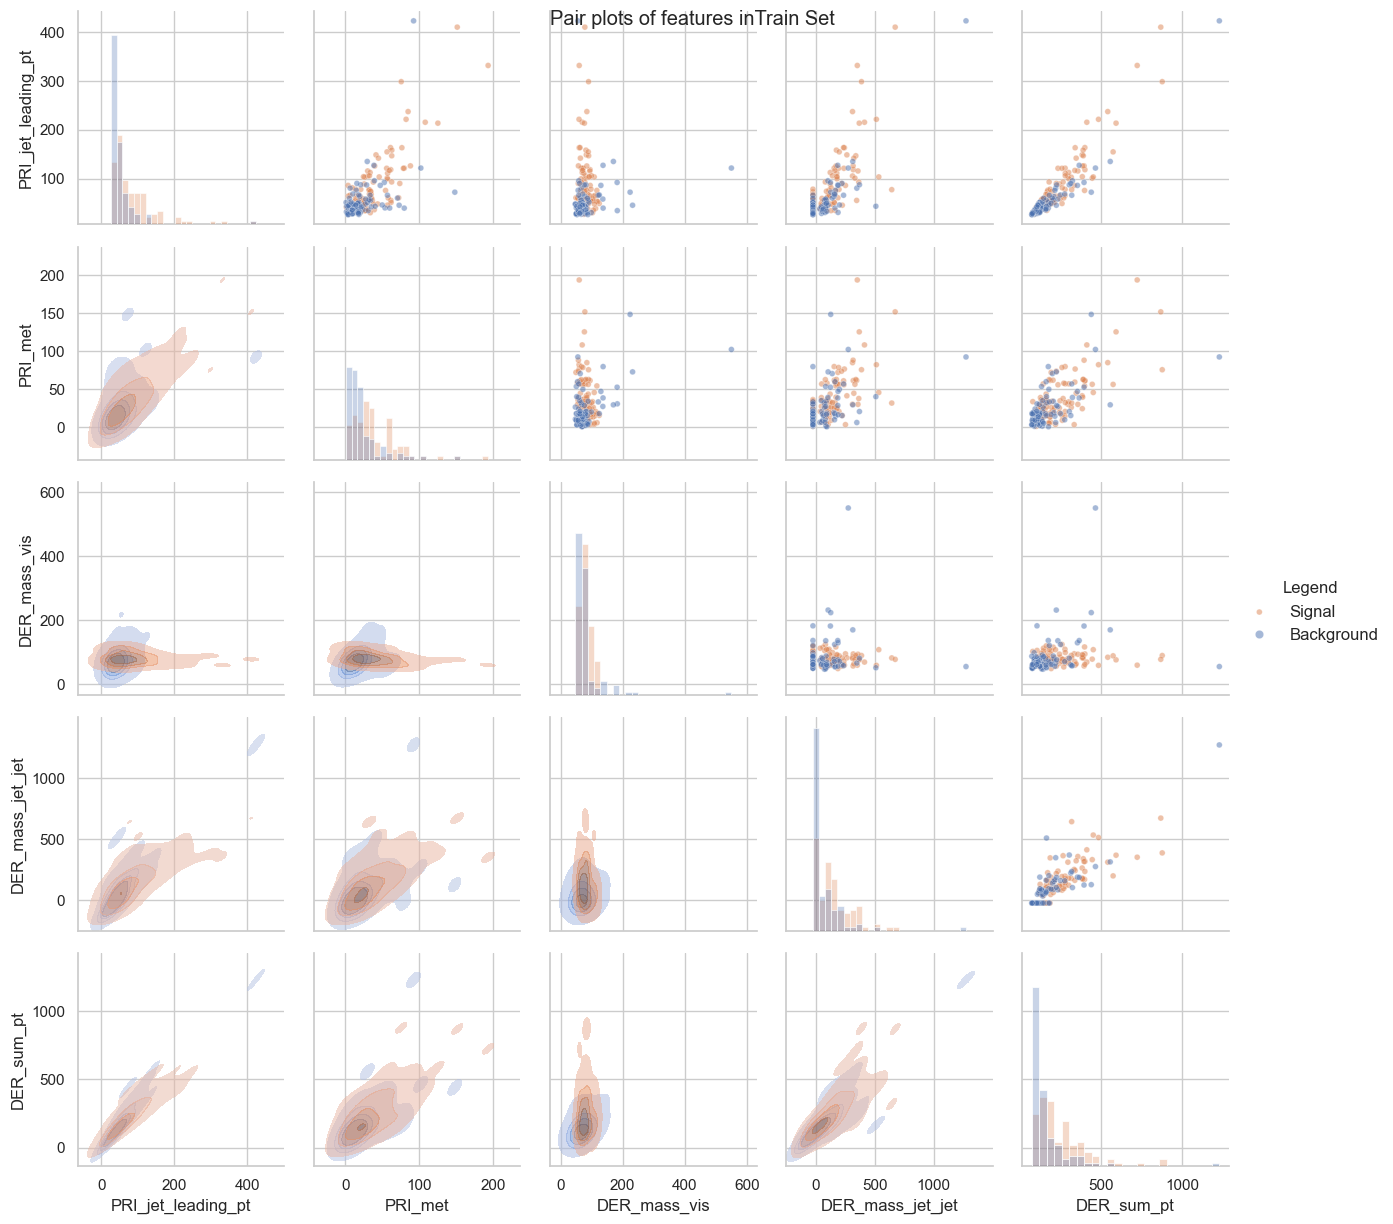

In [17]:
# Show data summary
train_visualize.pair_plots(sample_size=100)

In [18]:
syst_train_data = data.get_syst_train_set()

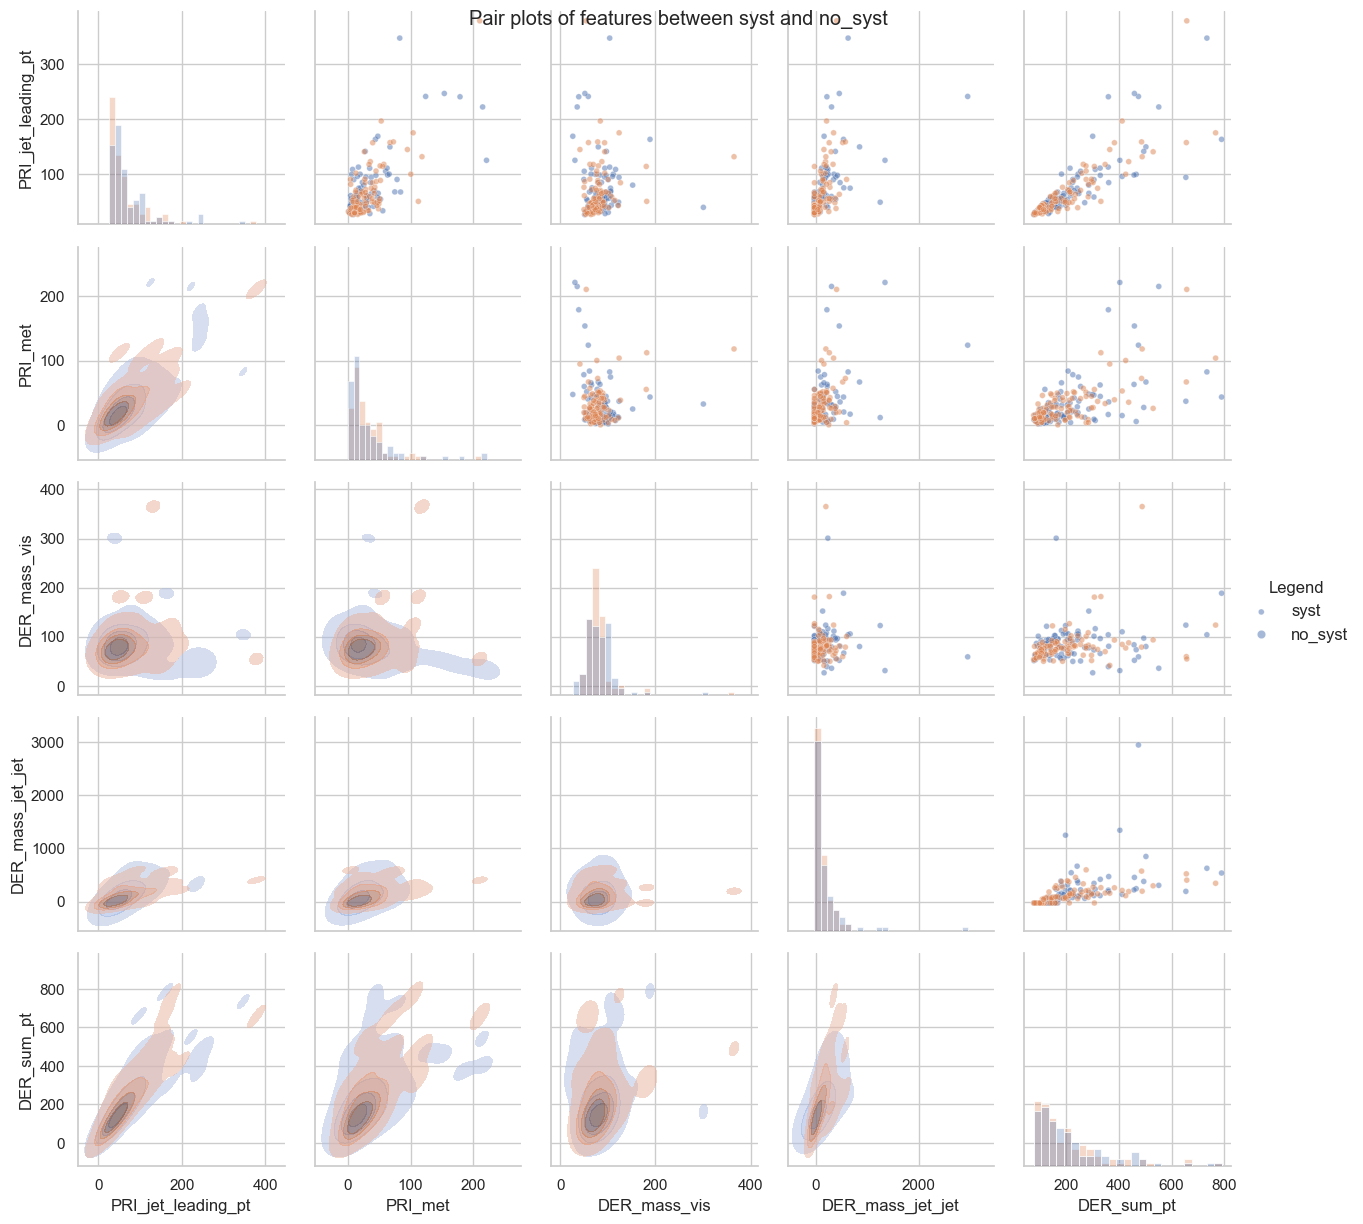

In [19]:
# Pair plots of train set with systematics
train_visualize.pair_plots_syst(syst_train_data["data"], sample_size=100)

***
### Program
***


In [20]:

from ingestion import Ingestion

ingestion = Ingestion(data)


In [21]:

# initialize submission
ingestion.init_submission(Model)

[*] Initializing Submmited Model
Model not found, retraining the model


## Statistical Tools
In the process of data fitting using our ingestion module, there are two primary arguments that control how the fit is performed: stat_only and syst_settings.
- `stat_only (bool, optional)`: This argument, when set to True, forces the fitting process to compute statistics-only results. This means that only statistical uncertainties are considered, and all systematic uncertainties are ignored.
- `syst_settings (dict, optional)`: This argument is a dictionary that specifies the systematic settings, indicating whether to fix certain systematics during the fitting process. Each entry in the dictionary represents a different systematic uncertainty, with a boolean value indicating whether it should be **fixed** (True) or allowed to **float** (False).

Note that the `syst_settings` is used to only control the systematics that are allowed to float during the fitting process. It is different from the `TEST_SETTINGS['systematics']` which is used to specify the systematics to be used in the test set generation.

In [22]:

# fit submission
ingestion.fit_submission()

[*] Calling fit method of submitted model
[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 28 entries, PRI_lep_pt to DER_lep_eta_centrality
dtypes: float32(28)
memory usage: 85.4 MB
None
[+] Train data loaded successfully
Full size of the data is 711724
Epoch 1/10, Loss: 12.336853981018066
Epoch 2/10, Loss: 12.142976760864258
Epoch 3/10, Loss: 12.019186019897461
Epoch 4/10, Loss: 11.95275592803955
Epoch 5/10, Loss: 11.925519943237305
Epoch 6/10, Loss: 11.915246963500977
Epoch 7/10, Loss: 11.900876998901367
Epoch 8/10, Loss: 11.870623588562012
Epoch 9/10, Loss: 11.825044631958008
Epoch 10/10, Loss: 11.771953582763672
score shape before threshold (355862,)
score shape after threshold (355862,)
saved_info {'beta': 3215540.41565442, 'gamma': 3310.0991863206546}
Train Results: 
	 mu_hat  :  1.0175650830773122
	 del_mu_stat  :  0.5420126175674099
	 del_mu_sys  :  0.10175650830773122
	 del_mu_tot  :  0.2757408496148407
Holdout Resul

In [23]:
# load test set
data.load_test_set()

[*] Loading Test data
[+] Test data loaded successfully


In [24]:

# predict submission
ingestion.predict_submission(test_settings)

[*] Calling predict method of submitted model
Test Results:  {'mu_hat': 1.0539213930498015, 'del_mu_stat': 0.5420126175674099, 'del_mu_sys': 0.10539213930498015, 'del_mu_tot': 0.27608204425023536}
[*] - mu_hat: 1.0539213930498015 - delta_mu_hat: 0.27608204425023536 - p16: 0.7778393487995661 - p84: 1.330003437300037
Test Results:  {'mu_hat': -0.9179228426074073, 'del_mu_stat': 0.5420126175674099, 'del_mu_sys': 0.09179228426074074, 'del_mu_tot': 0.27486519471009785}
[*] - mu_hat: -0.9179228426074073 - delta_mu_hat: 0.27486519471009785 - p16: -1.1927880373175053 - p84: -0.6430576478973095
Test Results:  {'mu_hat': 0.6741744642584561, 'del_mu_stat': 0.5420126175674099, 'del_mu_sys': 0.06741744642584561, 'del_mu_tot': 0.2730946675078338}
[*] - mu_hat: 0.6741744642584561 - delta_mu_hat: 0.2730946675078338 - p16: 0.4010797967506223 - p84: 0.9472691317662898
Test Results:  {'mu_hat': 3.31578714950231, 'del_mu_stat': 0.5420126175674099, 'del_mu_sys': 0.331578714950231, 'del_mu_tot': 0.317695656

In [25]:
ingestion.compute_result()

[*] Saving ingestion result


In [26]:

# save result
ingestion.save_result(output_dir)

***
# Score
***
1. Compute Scores
2. Visualize Scores


In [27]:
from score import Scoring

In [28]:
# Initialize Score
score = Scoring()

In [29]:
score.load_ingestion_results(output_dir)

[*] Reading predictions
[✔]


[*] Computing scores
------------------
Set 0
------------------
MAE (avg): 3.076955560793084
RMSE (avg): 3.9276128718837966
Interval: 0.5721713148581555
Coverage: 0.0
Quantiles Score: 0.5565399694393003
------------------
Set 1
------------------
MAE (avg): 0.9277247671125617
RMSE (avg): 0.6812621836687136
Interval: 0.5726116731376586
Coverage: 0.0
Quantiles Score: 0.5557719805420871
------------------
Set 2
------------------
MAE (avg): 1.0068210308060828
RMSE (avg): 0.8256749230534031
Interval: 0.6193908254687535
Coverage: 0.0
Quantiles Score: 0.4773749771761269
------------------
Set 3
------------------
MAE (avg): 0.3094900248551745
RMSE (avg): 0.258907514143055
Interval: 0.5582022413561083
Coverage: 0.5
Quantiles Score: 0.5812440799230221
------------------
Set 4
------------------
MAE (avg): 0.48034799580602616
RMSE (avg): 0.3116957522907033
Interval: 0.5441423690319798
Coverage: 0.5
Quantiles Score: 0.6067082908512625


Overall Score
[*] --- RMSE: 1.201
[*] --- MAE: 1.16
[*] --

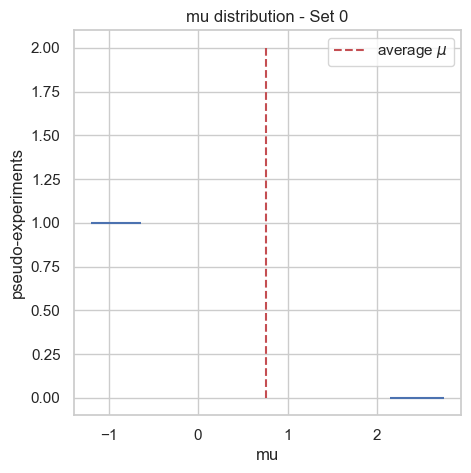

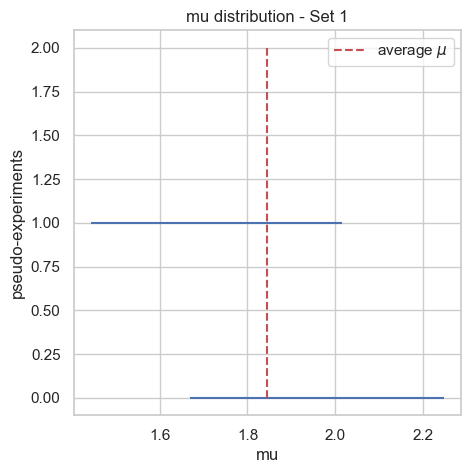

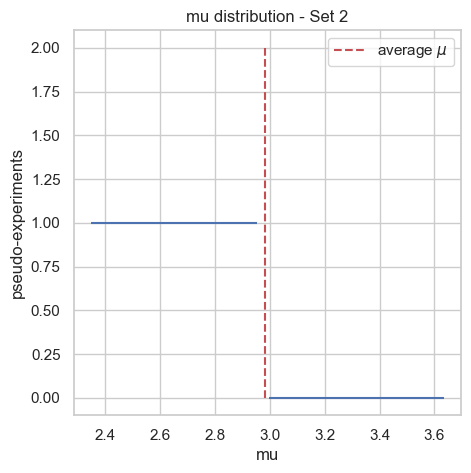

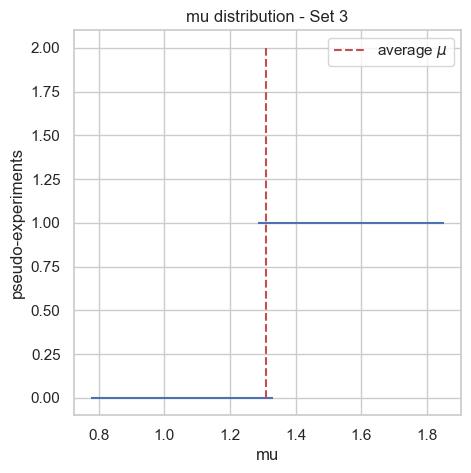

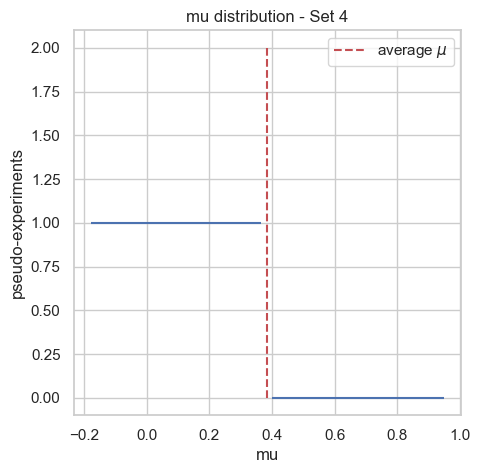

In [30]:
# Compute Score
score.compute_scores(test_settings)

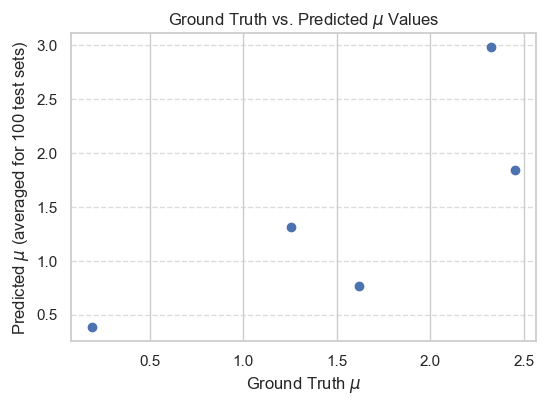

In [31]:
# Visualize scatter plot of ground truth mu and predicted mu
visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

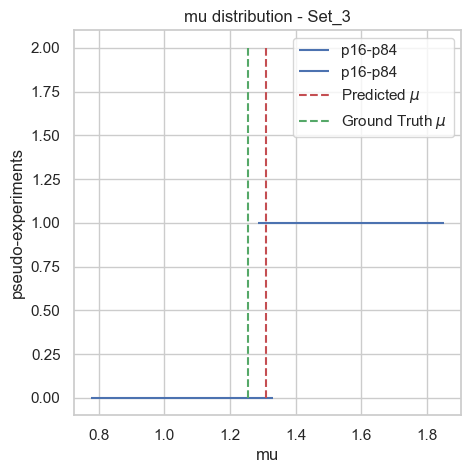

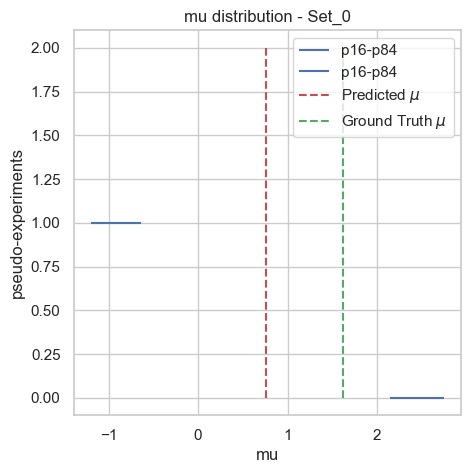

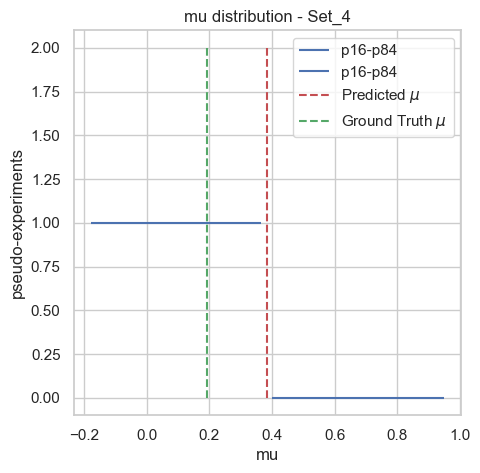

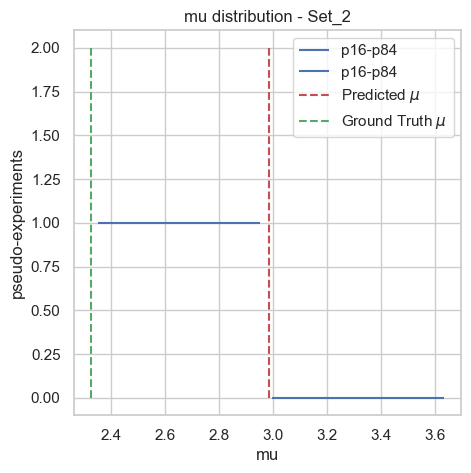

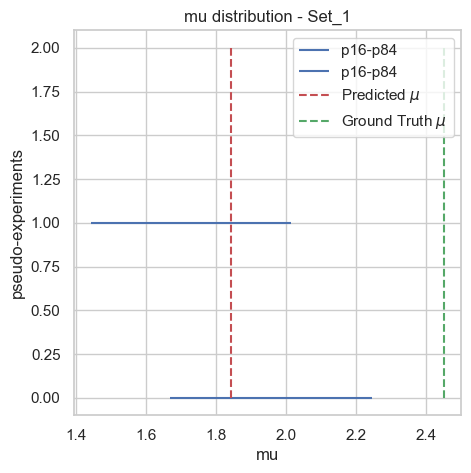

In [32]:
# Visualize coverage
visualize_coverage(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

***
# Submission
***

### **Prepare the submission**

In [33]:
import datetime
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'HiggsML-code_submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")
print("You can find the zip file in `HEP-Challenge/")

Submit : HiggsML-code_submission_24-08-19-14-27.zip to the competition
You can find the zip file in `HEP-Challenge/
